# House Price Prediction in Python
## Introduction
Estimating the sale prices of houses is one of the popular projects. So we are going to work on a dataset which consists information about the condition of the house , price and other aspects such as square feet etc. 

Steps:
1. Importing the required packages
2. Importing the house price dataset
3. Data Visualization on the house price data
4. Feature Selection & Data Split
5. Modeling the data 
6. Evaluating model performance




## 1 Importing the required packages
The primary packages for this project are going to be 
- ```pandas``` for data processing, 
- ```NumPy``` to work with arrays, 
- ```matplotlib``` & ```seaborn``` for data visualizations, 
- ```scikit-learn``` for building and evaluating our ML model. 


In [1]:
import numpy as np # working with arrays
import pandas as pd # data processing
import matplotlib.pyplot as plt # visualization
import seaborn as sb # visualization
import cufflinks as cf # visualization

from sklearn.model_selection import train_test_split, cross_val_score # data split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import explained_variance_score as evs # evaluation metric
from sklearn.metrics import r2_score as r2 # evaluation metric
from sklearn.linear_model import Ridge, LinearRegression, Lasso 
# OLS algorithm # Ridge algorithm # Lasso algorithm
# from sklearn.linear_model import BayesianRidge, ElasticNet
# # Bayesian algorithm # ElasticNet algorithm
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from termcolor import colored as cl # text customization
# from time import perf_counter
from math import sqrt

from IPython.display import Markdown, display
%matplotlib inline
def printmd(string): # Print with Markdowns    
    display(Markdown(string))

import warnings
warnings.filterwarnings(action='ignore')

sb.set_style('whitegrid') # plot style
plt.rcParams['figure.figsize'] = (20, 10) # plot size

## 2 Importing Data & EDA
This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

We are going to work with the house price dataset that contains various features and information about the house and its sale price. Using the ```read_csv``` function provided by the Pandas package which is faster then ```reas.csv```. Then we can import the data into our python environment. 

It's a great dataset for evaluating simple regression models.

#### 2.1 Definitions of the Variables
- id - Unique ID for each home sold
- date - Date of the home sale
- price - Price of each home sold
- bedrooms - Number of bedrooms
- bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
- sqft_living - Square footage of the apartments interior living space
- sqft_lot - Square footage of the land space
- floors - Number of floors
- waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
- view - An index from 0 to 4 of how good the view of the property was
- condition - An index from 1 to 5 on the condition of the apartment,
- grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
- sqft_above - The square footage of the interior housing space that is above ground level
- sqft_basement - The square footage of the interior housing space that is below ground level
- yr_built - The year the house was initially built
- yr_renovated - The year of the house’s last renovation
- zipcode - What zipcode area the house is in
- lat - Lattitude
- long - Longitude
- sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
- sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

Thanks to user Nova19 for the column definitions; https://www.kaggle.com/harlfoxem/housesalesprediction/discussion/207885

/Users/jeank4723/Desktop/kc_house_data.csv


In [2]:
df = pd.read_csv('/Users/jeank4723/Desktop/kc_house_data.csv', index_col = 0)
df.head()


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


#### 2.2 Missing value
use ```.isnull().sum()``` to see if there is any missing value

In [3]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

#### 2.3 Checking data type

In [4]:
print(cl(df.dtypes, attrs = ['bold']))

date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [5]:
# for i in ['price', 'bathrooms', 'floors', 'lat', 'long']:
#     df[i] = pd.to_numeric(df[i], errors = 'coerce')
#     df[i] = df[i].astype('int64')


# print(cl(df.dtypes, attrs = ['bold']))

In [6]:
perc =[.20, .40, .60, .80]
df.describe(percentiles = perc).apply(lambda s: s.apply('{0:.3f}'.format))

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000
mean,540088.142,3.371,2.115,2079.900,15106.968,1.494,0.008,0.234,3.409,7.657,1788.391,291.509,1971.005,84.402,98077.940,47.560,-122.214,1986.552,12768.456
std,367127.196,0.930,0.770,918.441,41420.512,0.540,0.087,0.766,0.651,1.175,828.091,442.575,29.373,401.679,53.505,0.139,0.141,685.391,27304.180
min,75000.000,0.000,0.000,290.000,520.000,1.000,0.000,0.000,1.000,1.000,290.000,0.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000
20%,298470.000,3.000,1.500,1320.000,4644.000,1.000,0.000,0.000,3.000,7.000,1120.000,0.000,1947.000,0.000,98028.000,47.432,-122.346,1420.000,4800.000
40%,399500.000,3.000,2.000,1710.000,6744.000,1.000,0.000,0.000,3.000,7.000,1400.000,0.000,1965.000,0.000,98053.000,47.540,-122.287,1690.000,6750.000
50%,450000.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,1560.000,0.000,1975.000,0.000,98065.000,47.572,-122.230,1840.000,7620.000
60%,519000.000,4.000,2.500,2130.000,8520.200,2.000,0.000,0.000,3.000,8.000,1760.000,0.000,1983.000,0.000,98103.000,47.621,-122.189,2020.000,8382.000
80%,700108.000,4.000,2.500,2730.000,12186.600,2.000,0.000,0.000,4.000,8.000,2410.000,700.000,2001.000,0.000,98125.000,47.691,-122.094,2510.000,11094.200
max,7700000.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,4820.000,2015.000,2015.000,98199.000,47.778,-121.315,6210.000,871200.000


# 3 Data Visualization


### 3.1 Heatmap:

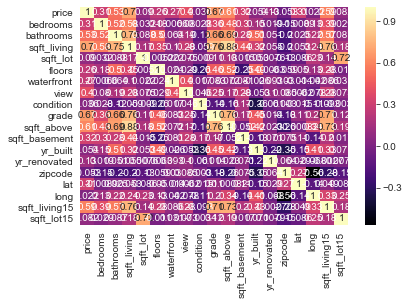

In [7]:
sb.heatmap(df.corr(), annot = True, cmap = 'magma')

plt.show()

### 3.2 Histogram, Boxplot and Violinplot


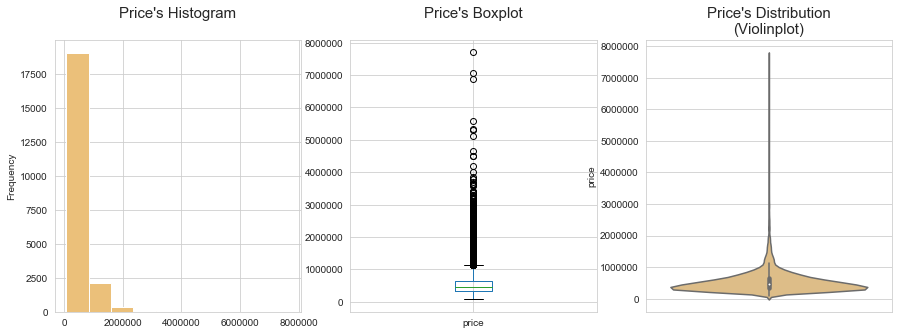

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

df['price'].plot.hist(by='price',ax = axes[0], color = '#ebc07a')
axes[0].set_title('Price\'s Histogram\n', fontsize = 15)

df['price'].plot.box(ax = axes[1])
axes[1].set_title('Price\'s Boxplot\n', fontsize = 15)

sb.violinplot(ax = axes[2], y = 'price', data = df, color = '#ebc07a')
axes[2].set_title('Price\'s Distribution\n(Violinplot)', fontsize = 15)

plt.show()

#### 3.2.1 Outliers
As we can see there are strong outliers. We'll filter them out and keep only the prices lower than 1,000,000.

In [9]:
df_1000000 = df[df['price'] < 1000000]

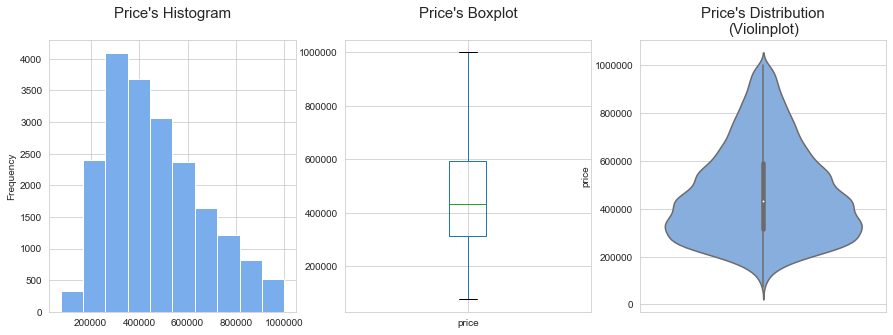

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

df_1000000['price'].plot.hist(by='price',ax = axes[0], color = '#7aadeb')
axes[0].set_title('Price\'s Histogram\n', fontsize = 15)

df_1000000['price'].plot.box(ax = axes[1])
axes[1].set_title('Price\'s Boxplot\n', fontsize = 15)

sb.violinplot(ax = axes[2], y = 'price', data = df_1000000, color = '#7aadeb')
axes[2].set_title('Price\'s Distribution\n(Violinplot)', fontsize = 15)

plt.show()

We use ```iplot``` function to present more detail for histogram plot as below.

In [11]:
cf.go_offline()

In [12]:
df['price'].iplot(title ='Price\'s Histogram\n', kind='hist',bins=300, color = '#7aadeb' )

## 3.3 Scatter plot

#### 3.3.1 Correlation

In [13]:
# The columns
categorical = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade']
continous = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built', 
             'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

In [14]:
continous_df = df[continous]
cdf = pd.DataFrame(continous_df.corrwith(df['price']),columns=["correlation"])

print(cdf)

               correlation
sqft_living       0.702035
sqft_lot          0.089661
sqft_above        0.605567
sqft_basement     0.323816
yr_built          0.054012
yr_renovated      0.126434
zipcode          -0.053203
lat               0.307003
long              0.021626
sqft_living15     0.585379
sqft_lot15        0.082447


In [15]:
categorical_df = df[categorical]
cdf_con = pd.DataFrame(categorical_df.corrwith(df['price']),columns=["correlation"])

print(cdf_con)

            correlation
bedrooms       0.308350
bathrooms      0.525138
floors         0.256794
waterfront     0.266369
view           0.397293
condition      0.036362
grade          0.667434


As the results, we can see that the price is highly related to "sqft_living", "sqft_above" and  "sqft_living15" those correlations are hight than 0.5.
For categorical data, the price is highly related to "bathrooms" and "grade".

### 3.3.2 Plot

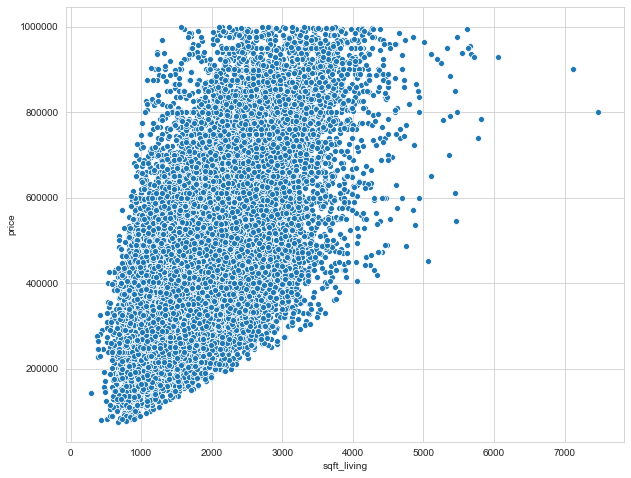

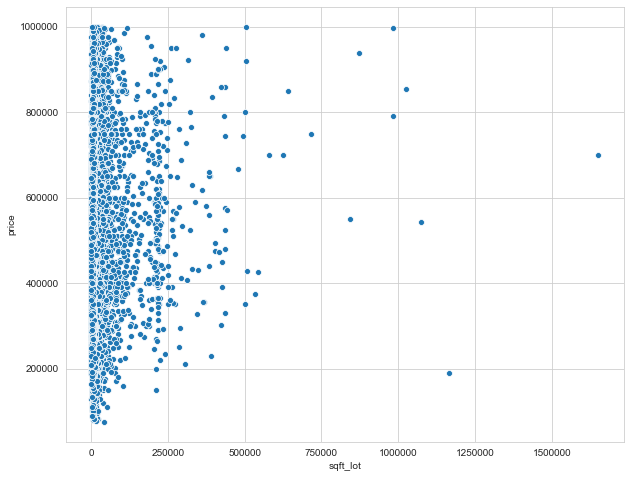

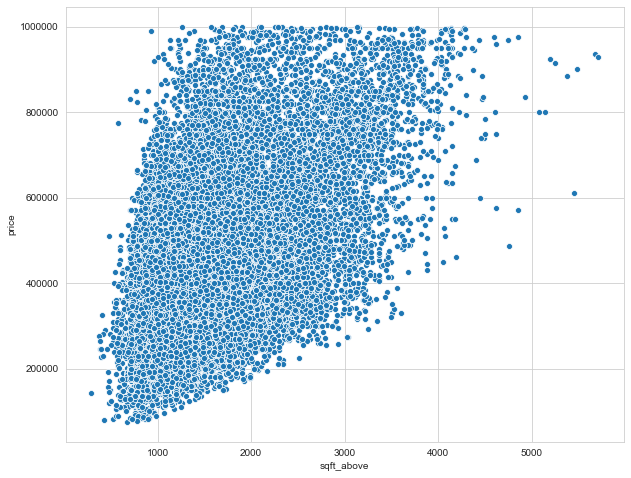

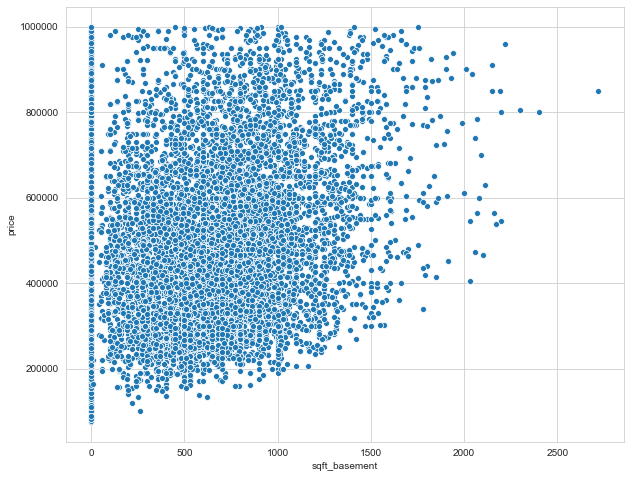

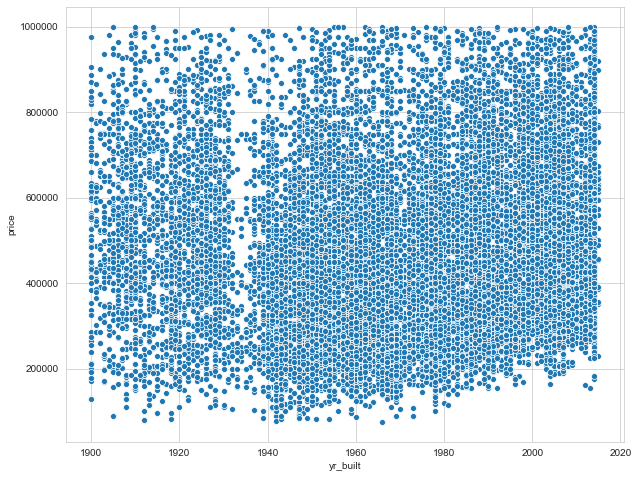

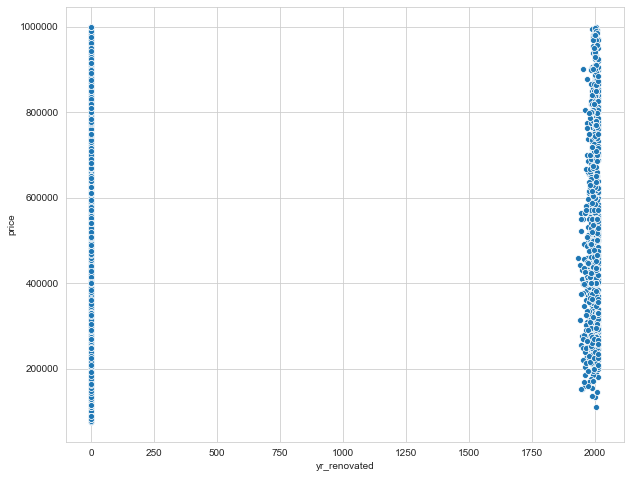

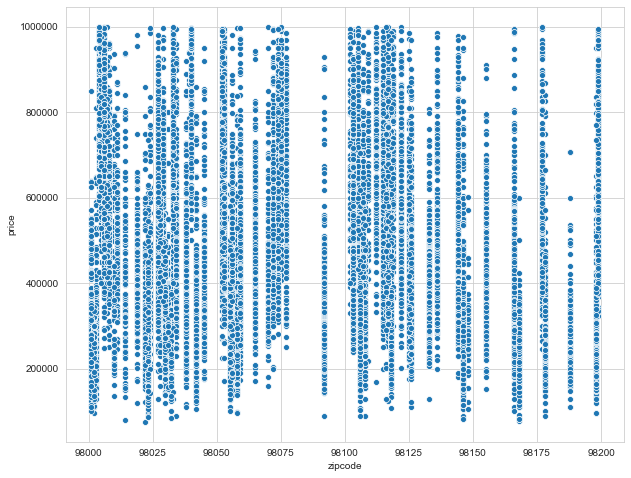

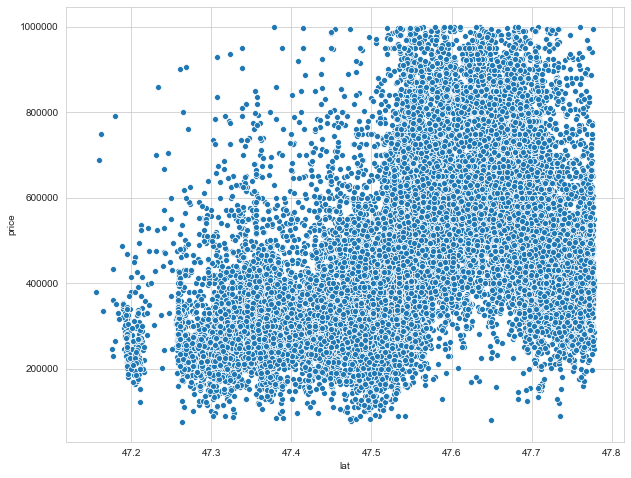

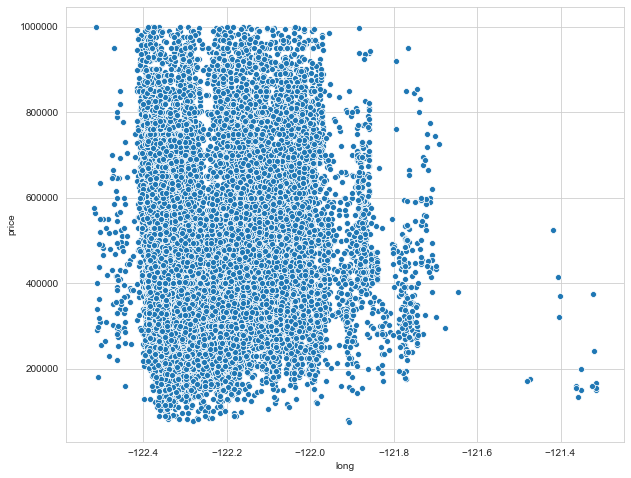

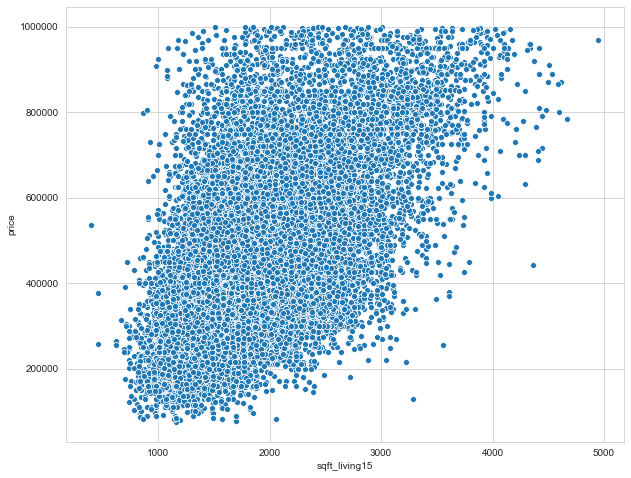

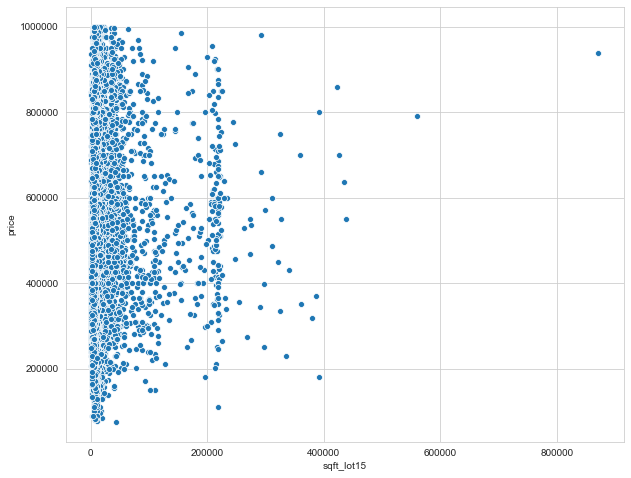

In [16]:
for i_continous in continous:
    plt.figure(figsize=(10,8))
    sb.scatterplot(x=i_continous, y='price', data=df_1000000)

### 3.4 Box plot

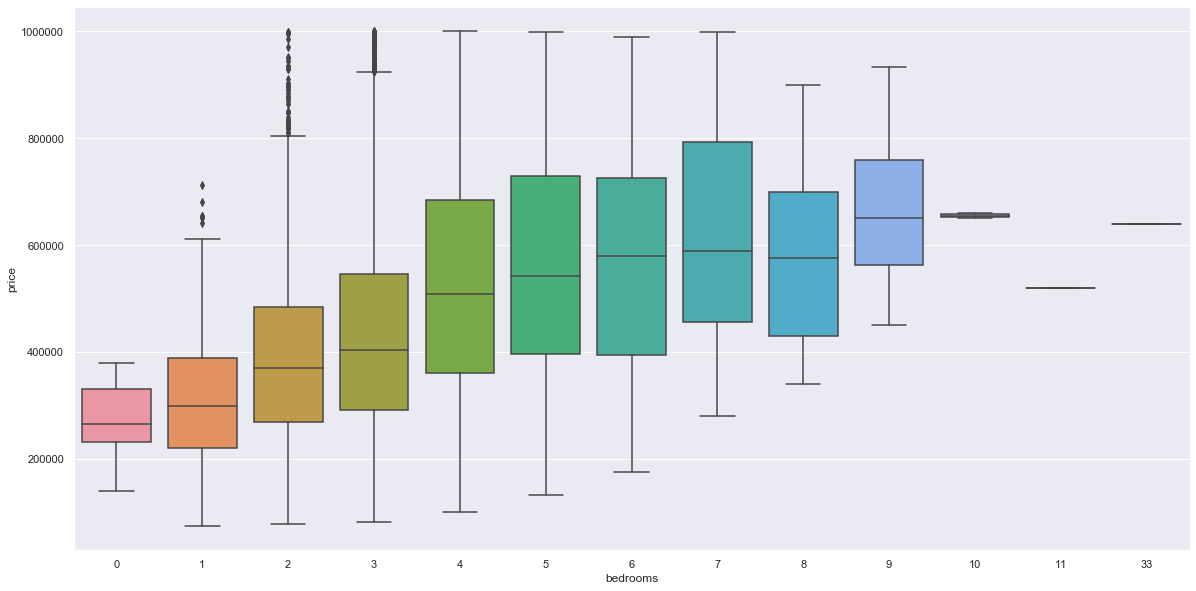

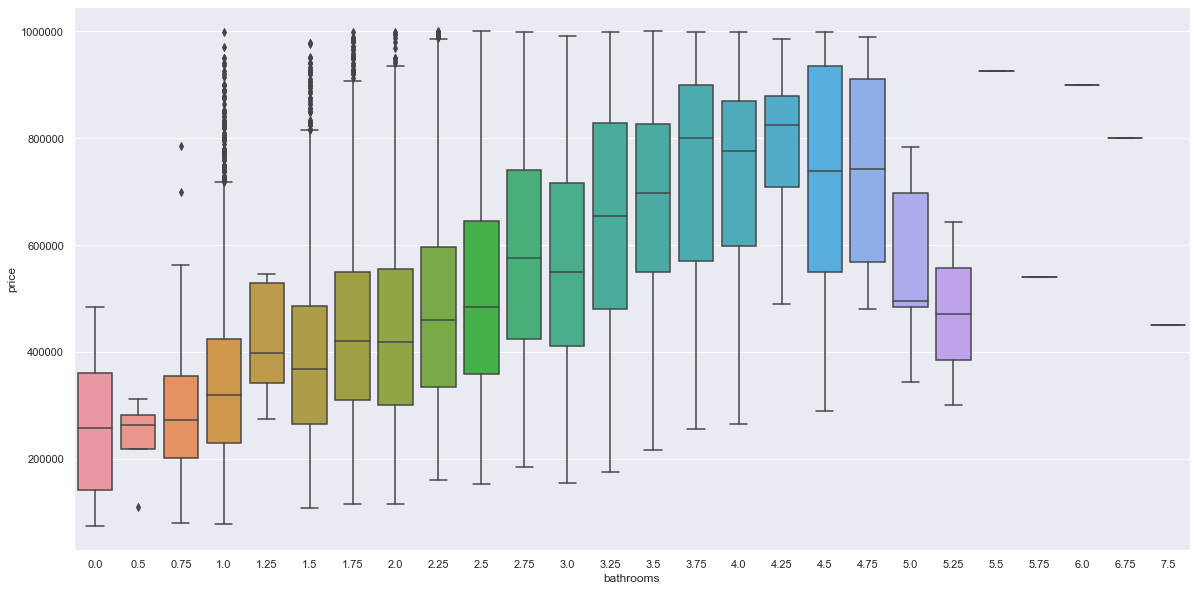

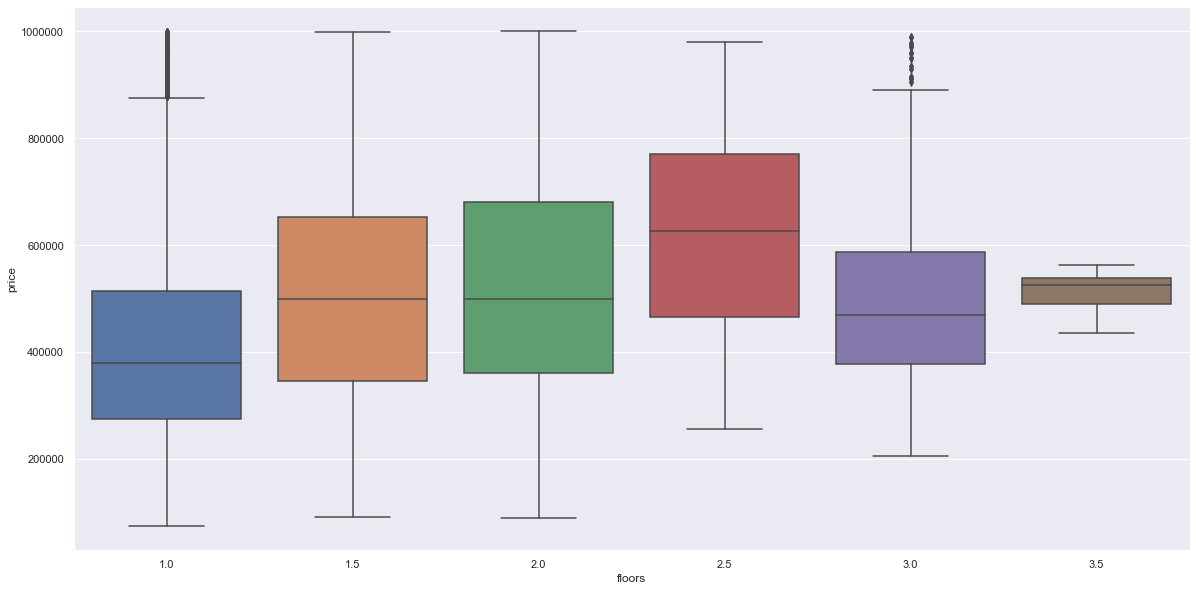

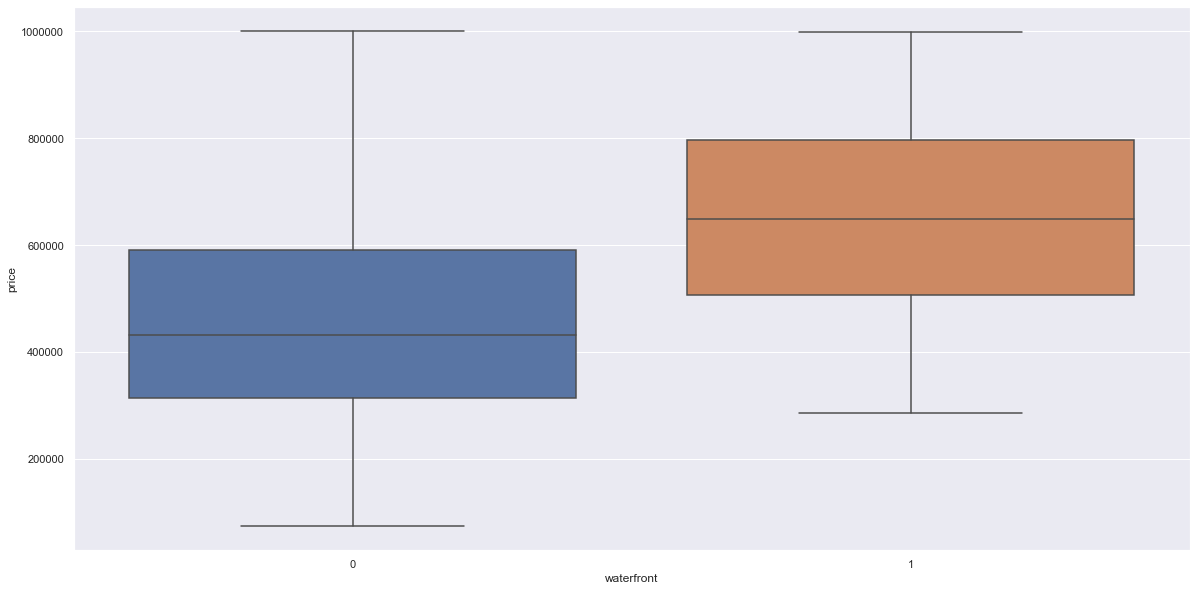

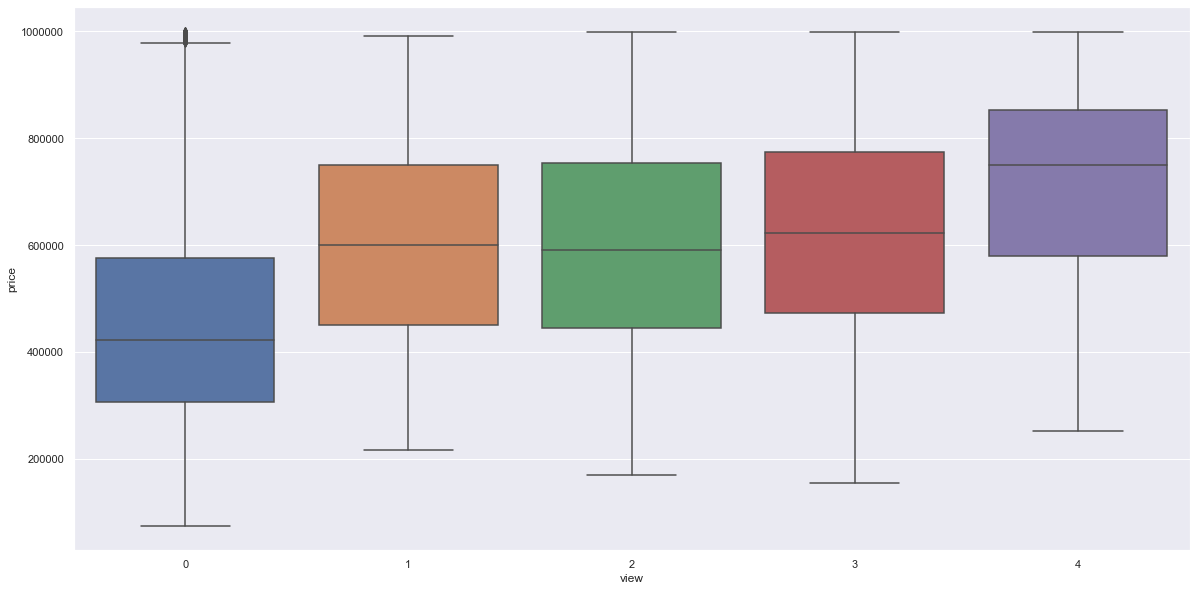

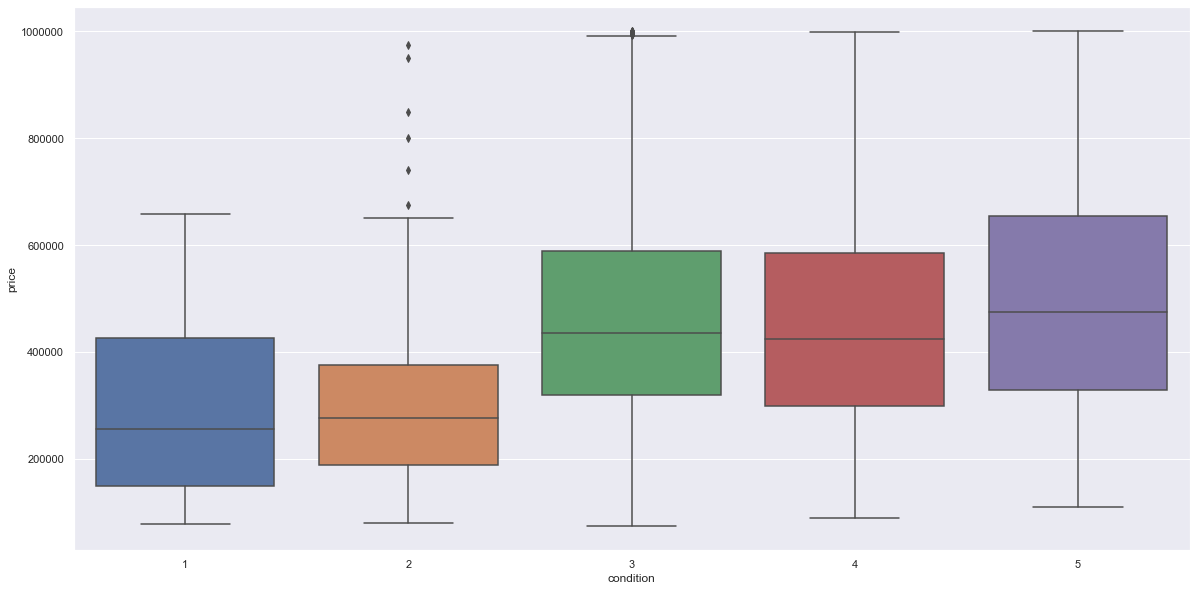

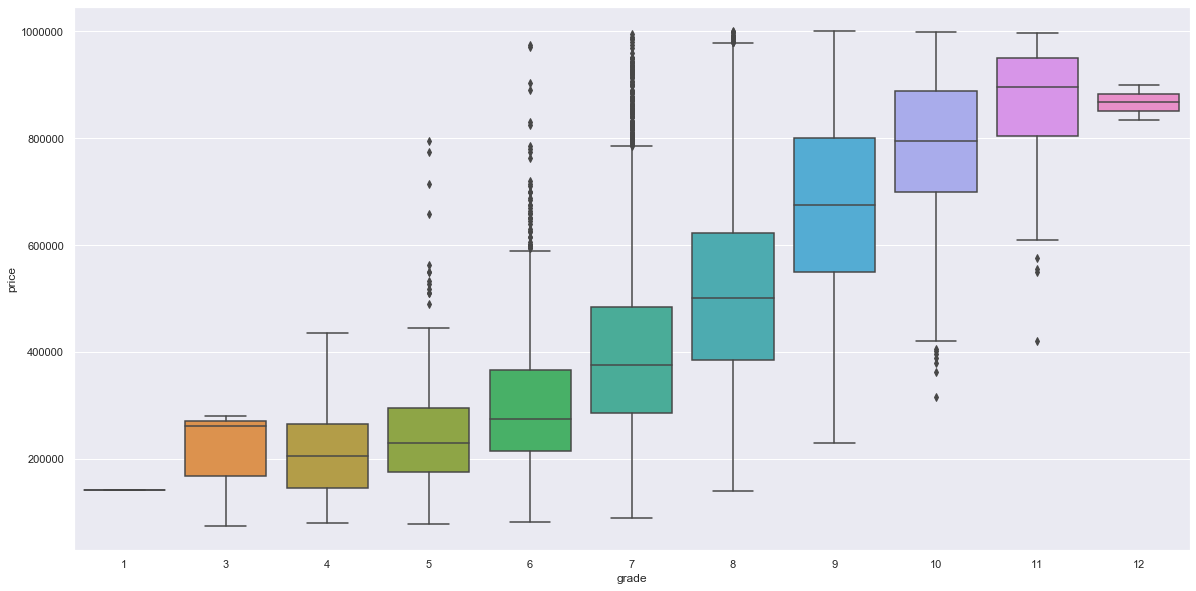

In [17]:
for i_categorical in categorical:
    sb.set(rc={'figure.figsize':(20,10)})
    sb.boxplot(x=i_categorical, y='price', data=df_1000000)
    plt.show()
    plt.close()
    

## 4 Feature Selection & Data Split


In [18]:
# Split the data for X and y
X = df[['sqft_above', 'sqft_living15', 'sqft_living', 'sqft_basement', 'bedrooms', 'bathrooms', 'waterfront', 'floors', 'lat', 'view' , 'grade']]
y = df[['price']]

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### 4.1 Building models




In [19]:
# MODELING

# OLS
ols = LinearRegression()
ols.fit(X_train, y_train)
ols_yhat = ols.predict(X_test)

# Ridge
ridge = Ridge(alpha = 0.5)
ridge.fit(X_train, y_train)
ridge_yhat = ridge.predict(X_test)

# Lasso
lasso = Lasso(alpha = 0.01)
lasso.fit(X_train, y_train)
lasso_yhat = lasso.predict(X_test)



In [20]:
pred_train_ols=ols.predict(X_train)
MSE_ols = np.sqrt(mean_squared_error(y_train,pred_train_ols))
r2_ols = r2(y_train, pred_train_ols)
print("The MSE of OLS of model {}".format(MSE_ols))
print("The R-SQUARE of OLS of model {}".format(r2_ols))

pred_test_ols= ols.predict(X_test)
MSE__test_ols= np.sqrt(mean_squared_error(y_test,pred_test_ols)) 
r2_test_ols= r2(y_test, pred_test_ols)
print("The MSE of OLS of test model {}".format(MSE__test_ols))
print("The R-SQUARE of OLS of test model {}".format(r2_test_ols))


The MSE of OLS of model 217550.66120467396
The R-SQUARE of OLS of model 0.6587791435133016
The MSE of OLS of test model 203553.56200261106
The R-SQUARE of OLS of test model 0.6515929603856019


## 5 Polynomial Regression and Normalization


```.fit(X_train, y_train)``` for Fit the model
```.get_params()``` for Get parameters for this estimator.

### 5.1 OSL Regression

In [21]:
pipe_info = [('Normalize', StandardScaler()), ('Polynomial Features', PolynomialFeatures(include_bias=False)), 
             ('Linear Model', LinearRegression())]
pipe = Pipeline(pipe_info)
pipe.fit(X_train, y_train)



Pipeline(memory=None,
         steps=[('Normalize',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('Polynomial Features',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('Linear Model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

0.7298001985707693


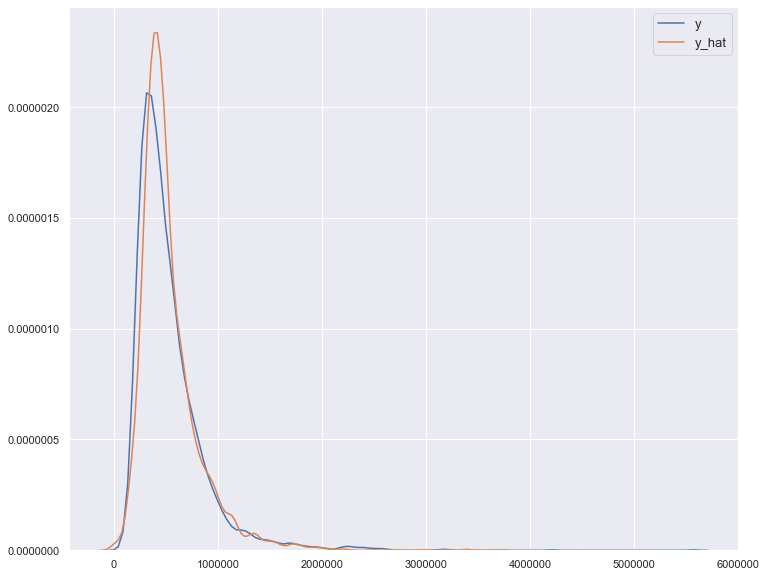

In [22]:
yhat_test_pipe = pipe.predict(X_test)
yhat_test_pipe_df = pd.DataFrame(yhat_test_pipe, columns=['predicted_price'])

pipe_r2 = pipe.score(X_test, y_test)
print(pipe_r2)

plt.figure(figsize=(12,10))
ax = sb.kdeplot(y_test['price'])
ax = sb.kdeplot(yhat_test_pipe_df['predicted_price'], ax=ax)
ax.legend(['y', 'y_hat'], fontsize=13);


### 5.2 Regularized Regression


### 5.2.1 Lasso Regression

In [23]:
pipe_info_lasso = [('Scaling', StandardScaler()), 
              ('Polynomial Features', PolynomialFeatures(include_bias=False)), 
              ('Lasso Linear Regression', Lasso())]
lasso_pipe = Pipeline(pipe_info_lasso)
lasso_pipe.get_params()


{'memory': None,
 'steps': [('Scaling',
   StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('Polynomial Features',
   PolynomialFeatures(degree=2, include_bias=False, interaction_only=False,
                      order='C')),
  ('Lasso Linear Regression',
   Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
         normalize=False, positive=False, precompute=False, random_state=None,
         selection='cyclic', tol=0.0001, warm_start=False))],
 'verbose': False,
 'Scaling': StandardScaler(copy=True, with_mean=True, with_std=True),
 'Polynomial Features': PolynomialFeatures(degree=2, include_bias=False, interaction_only=False,
                    order='C'),
 'Lasso Linear Regression': Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
       normalize=False, positive=False, precompute=False, random_state=None,
       selection='cyclic', tol=0.0001, warm_start=False),
 'Scaling__copy': True,
 'Scaling__with_mean': True,
 'Scaling__with_std': T

In [24]:
lasso_params_dict = {'Lasso Linear Regression__alpha': [0.0001, 0.001, 0.01, 0.1, 0, 
                                           1, 10, 100, 1000, 10000]}

lasso_grid = GridSearchCV(estimator=lasso_pipe, param_grid=lasso_params_dict, 
                          scoring='r2', cv=5 )

In [25]:
lasso_grid.fit(X_train, y_train)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('Scaling',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('Polynomial Features',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=False,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('Lasso Linear Regression',
                                        Lasso(alpha=1.0, copy_X=True,
                                              fit_intercept=True, max_iter=1000,
                                              normalize=Fal

In [26]:
lasso_grid.best_params_


{'Lasso Linear Regression__alpha': 1000}

In [27]:
best_lasso = lasso_grid.best_estimator_
best_lasso


Pipeline(memory=None,
         steps=[('Scaling',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('Polynomial Features',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('Lasso Linear Regression',
                 Lasso(alpha=1000, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=None, selection='cyclic',
                       tol=0.0001, warm_start=False))],
         verbose=False)

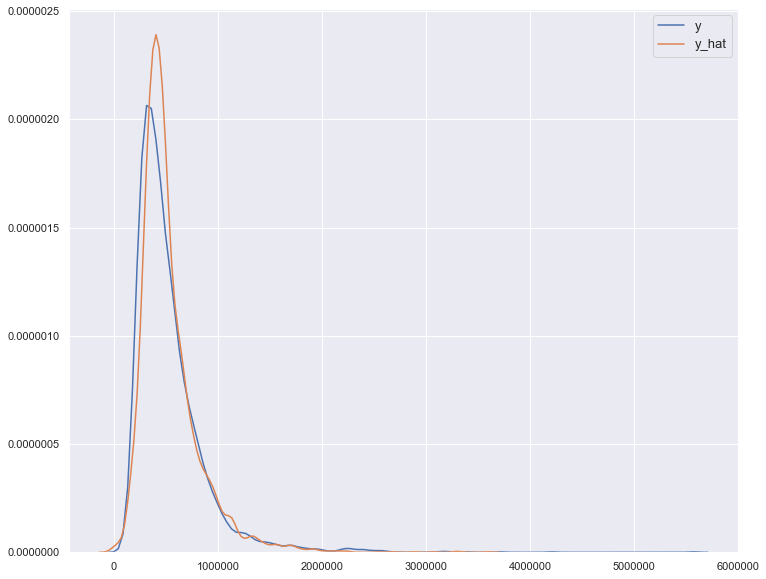

In [28]:
# distribution plot
yhat_lasso = best_lasso.predict(X_test)
yhat_lasso_df = pd.DataFrame(yhat_lasso, columns=['predicted_price'])
plt.figure(figsize=(12,10))
ax = sb.kdeplot(y_test['price'])
ax = sb.kdeplot(yhat_lasso_df['predicted_price'], ax=ax)
ax.legend(['y', 'y_hat'], fontsize=13);


In [29]:
lasso_grid.best_score_

0.734019131317271